<a href="https://colab.research.google.com/github/hoongAng/AboutMe/blob/master/SalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ang Ee Hoong 19WMR04325<br>
Foo Jun Seng 19WMR09744<br>
Wong Heng Keat 19WMU09813<br>
Koh Li Wei 19WMR09755<br>
RSF3 Group4

# **Stage1- Business Undertstanding**

**Background**: The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world, it normally takes more than one month to ship products via ocean to different central warehouses. <br>

<br>**Objective**: 

*   To forecasts for each product in different central with reasonable accuracy for the monthly demand for month after next can be achieved.
*   To forecasts for each product in different central with reasonable accuracy for the yearly demand. 
*   To forecasts for each different category demand among the different centrals.

<br>**Constraint**: 

*   The incomplete data rows will affect the accuracy of forecasting such as an order without the order date could affect the monthly sales result.
*   The outstanding data rows will generate an outlier result such as a monthly sale result is 5 times more than previous monthly sales.

<br>**Business Problem**: 
*   Is the order damand related to the warehouse location?
*   Is the order demand related to the product category?
*   Can the sales of a product be predicted based on the order demand records with reasonable accuracy?

<br>**Goals**: 
*   To predict total category and product sales in the next few months and years. 
*   To predict the total sales based on total product order demand in the warehouse location. 



# **Stage2- Data Understanding**

This dataset is all real-life data and products/warehouse and category information encoded. The data is taken from the kaggle and can be downloaded <a href = "https://www.kaggle.com/felixzhao/productdemandforecasting"> here </a>.<br>




##***2.1 Data Description Report***<br>

The total data row has 1048576. The data that has been acquired:<br> 
1.   Product_code
*   The product name encoded.
*   The naming format is "Product_(NUMBER)".
*   The product number from 0000 to 2172, total 2173 products. 
*   To allow us understand which product is best selling.
*   To allow us forecast the quantity demand.

2.   Warehouse
*   The warehouse name encoded.
*   The naming format is "Whse_(Alphabet)".
*   The warehouse alphabet from A to S, total 19 warehouses.
*   To allow us understand which warehouse created most sales.
*   To allow us forecast the warehouse sales.

3.   Product_Category
*   The Product Category for each Product_Code encoded.
*   The naming format is "Category_(NUMBER)".
*   The category number from 001 to 033, total 33 type of categories.
*   To allow us know which product belong to which category.
*   To allow us forecast which category product is high demand. 
*   To classify the product as category number rather than quanlified variable.

4.   Date
*   The date customer orders the product.
*   The date format is "yyyy/mm/dd".
*   The order date is made from 2011/01 to 2017/01, total 6 years record.
*   To allow us know total sales on every year.
*   To allow us forecast the following year and month sales.
*   To allow us compare total sales between different month and year. 

5.   Order_Demand
*   The single order quantity. 
*   The quantity is number, from -999000 to 4000000.
*   To allow us know the ordered quantity of the particular product.
*   To allow us understand the order status, such as negative quantity is refund order and positive quantity is succes order. 
<br> 

View the first 100 rows data from the dataset.csv file from the Google drive.

In [10]:
#import for 
from __future__ import division

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objs as go
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd # Data handling and managing
import seaborn as sn
import matplotlib.pyplot as plt

#link to google drive
from google.colab import drive
drive.mount('/content/drive')
#open the dataset.csv file
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/dataset.csv', parse_dates=['Date'])#for Arima Model
df_sales = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/dataset.csv',parse_dates=['Date']) ##for LSTM model
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/dataset.csv', parse_dates=['Date'])##AR +MA
df.head(100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
95,Product_1512,Whse_J,Category_019,2012-06-15,30000
96,Product_1512,Whse_J,Category_019,2012-06-20,30000
97,Product_1512,Whse_J,Category_019,2012-07-04,30000
98,Product_1274,Whse_J,Category_019,2012-06-19,1000


To check all the data types of every column in the table from the dataset.csv file.

In [ ]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

##***2.2 Data exploration report***<br>
*   To indicate how many empty value in the data rows.
*   Apply Univariate Analysis to know which warehouse having highest number of order_demand.
*   Apply Bivariate Analysis to know which warehouse having highest number of order_demand by knowing the product_category.

To find out which column in the table is having empty value and calculate the total of the empty value with the sum() function.

In [ ]:
print (df.isna().sum())

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64


To find total column and row of the entire table from the dataset.csv file.

In [ ]:
df.shape

(1048575, 5)

Since the Date is the only column that having null data, so calculate its ratio of mission.<br>
Taking its mission row devide by total of the row in the table then multiple 100.

In [ ]:
print('Ratio of "Dates" that contain NA :',11239/1048575*100) 

Ratio of "Dates" that contain NA : 1.0718355863910547


## ***2.3 Univariate Analysis- Warehouse, Product Category***

This analysis only considering Warehouse, Product Category columns for UniVariate Analysis.

Find the warehouse shipping by orders(count of row for Order_Demand).

In [ ]:
df['Warehouse'].value_counts().sort_values(ascending=False)

Whse_J    764447
Whse_A    153574
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64

Now will get the amount of orders shipped by each warehouse and the warehouse J is clearly shipping most orders. Although S is shipping more quantity within fewer requested orders.

In [ ]:
df.groupby('Warehouse').sum().sort_values('Order_Demand', ascending = False)

,Product_Code,Product_Category,Order_Demand
Warehouse,,,
Whse_A,Product_0905Product_0097Product_1496Product_00...,Category_023Category_019Category_019Category_0...,50 6000 5000 6000 3900 2100 5000 200 100 100 1...
Whse_S,Product_1994Product_0558Product_0560Product_05...,Category_019Category_030Category_030Category_0...,3000 5000 15000 2000 100 300 200 2000 2000 500...
Whse_C,Product_1581Product_1581Product_1581Product_20...,Category_005Category_005Category_005Category_0...,2000 2000 5000 2000 5000 6000 10000 2000 1000 ...
Whse_J,Product_0993Product_0979Product_0979Product_09...,Category_028Category_028Category_028Category_0...,100 500 500 500 500 500 500 500 500 500 500 50...


**Product Category Analysis**<br>
To find the total of product having in this dataset

In [ ]:
from pylab import *
print(len(df['Product_Category'].value_counts()))
rcParams['figure.figsize']=50,20

33


Plot all category into a bar chart graph to understand the total number of order_demand in each category.

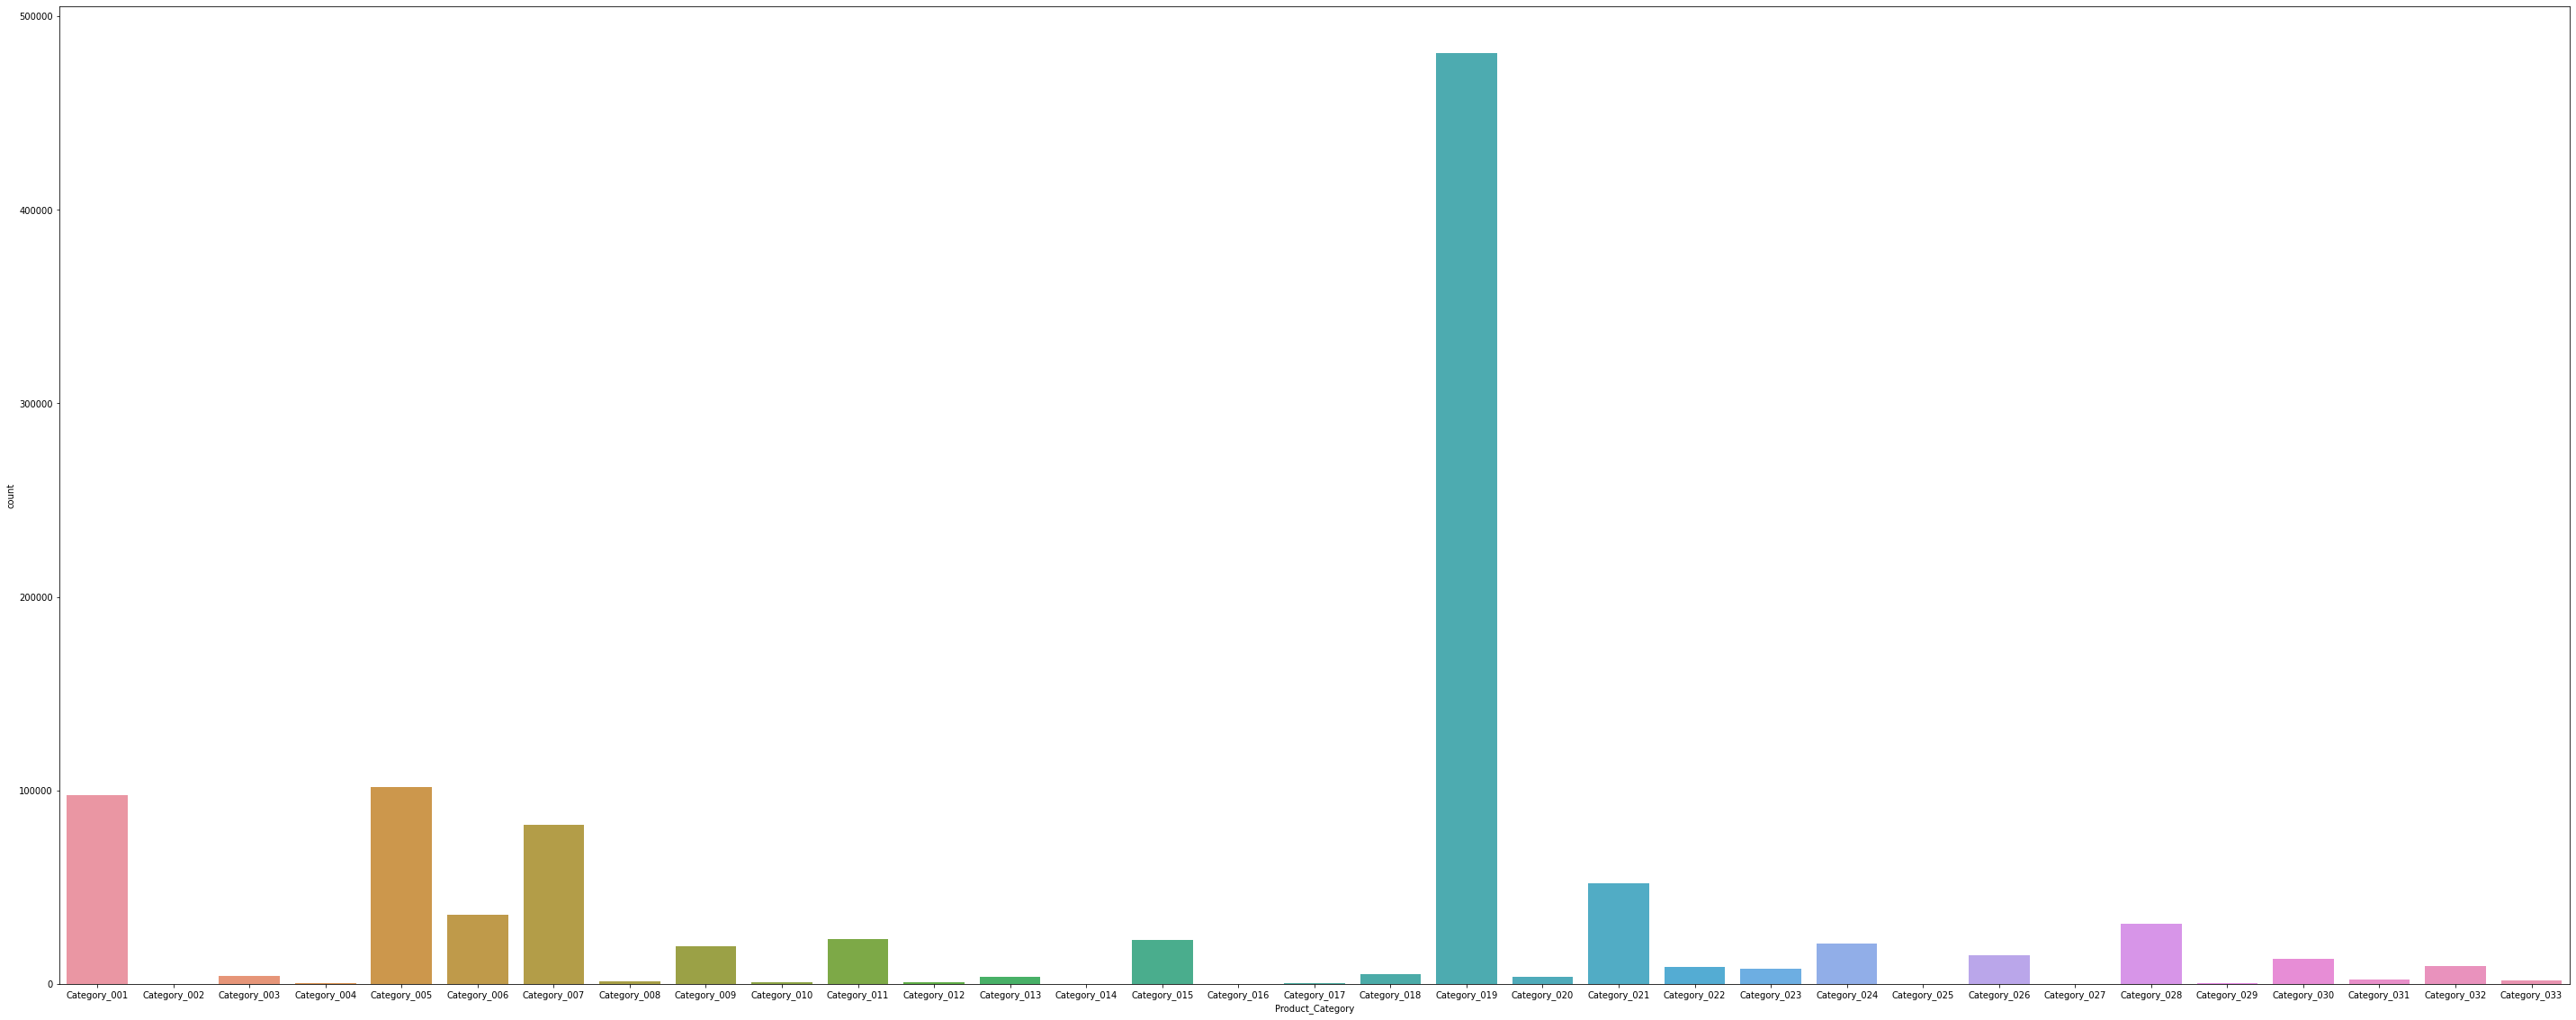

In [ ]:
sn.countplot(df['Product_Category'].sort_values(ascending=True))

The line graph is to understand the average monthly sales based on the total order_demand of all category.

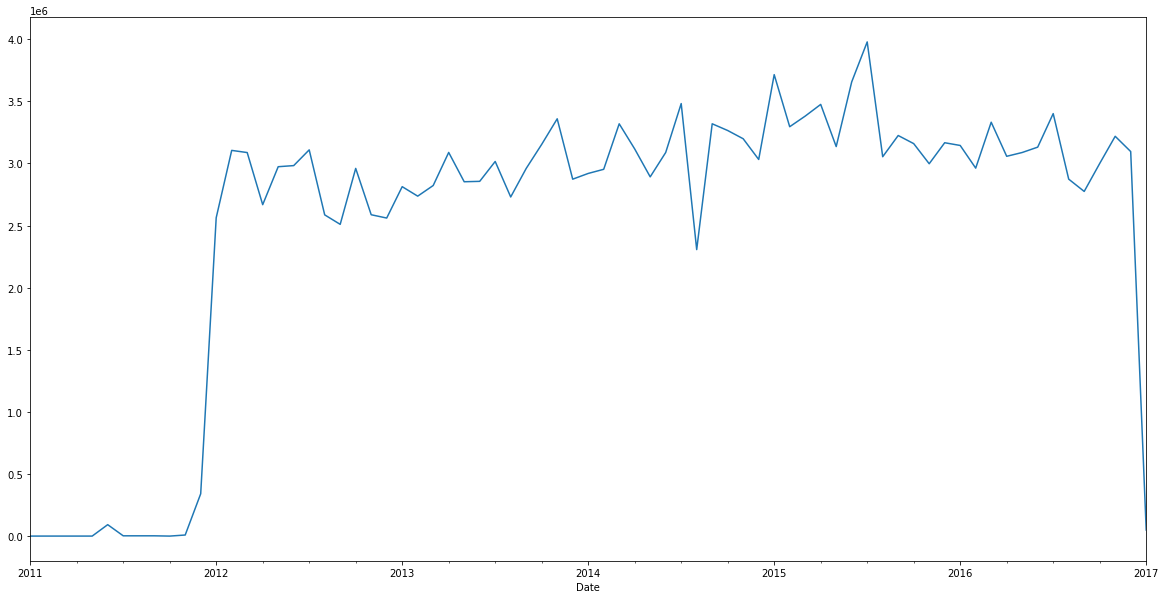

In [ ]:
monthly_avg_sales.plot(figsize=(20,10))
plt.show()

Findings:  

*   The sales are always low for the beginning of the year and the highest peak in demand every year is in the last quarter.
*   The observed trend shows that orders were higher during 2014-2016 then reducing down slowly.

## ***2.4 Bivariate Analysis***

Creating a Bivariate Analysis for where house and product category with Order Demand as Target Variable.

The Box Plot graph is to compare the total number of average order_demand between the four warehouses such as understanding the median value quickly looking at the box center line. 

**Step-01**: Check the Order Demand Qty by WareHouse

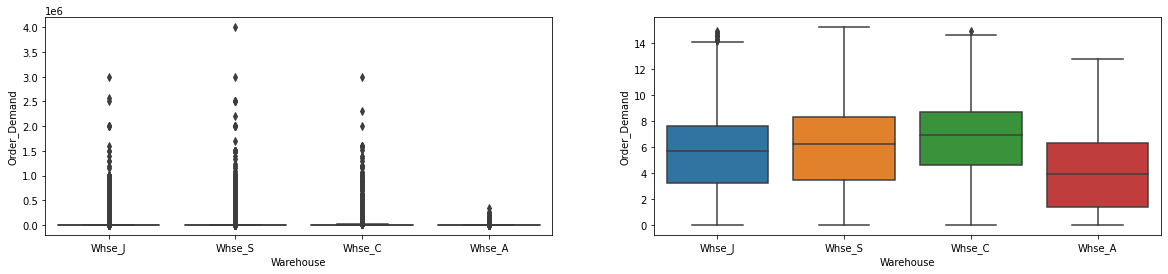

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,4 #Figure Size in Inches for Plotting
f, axes = plt.subplots(1,2)#the axis interval
regDataWH=sn.boxplot(df['Warehouse'],df['Order_Demand'],ax=axes[0]) #Create a variable for Regular Data for WH and OD 
logDataWH=sn.boxplot(df['Warehouse'],np.log1p(df['Order_Demand']),ax=axes[1]) #Craete a Variable with Log Transformation
del regDataWH, logDataWH

**Step-02**: Check the Order Demand Qty by Product Category (PC)

This is to visualize the total number of average order_demnad based on the product_category.

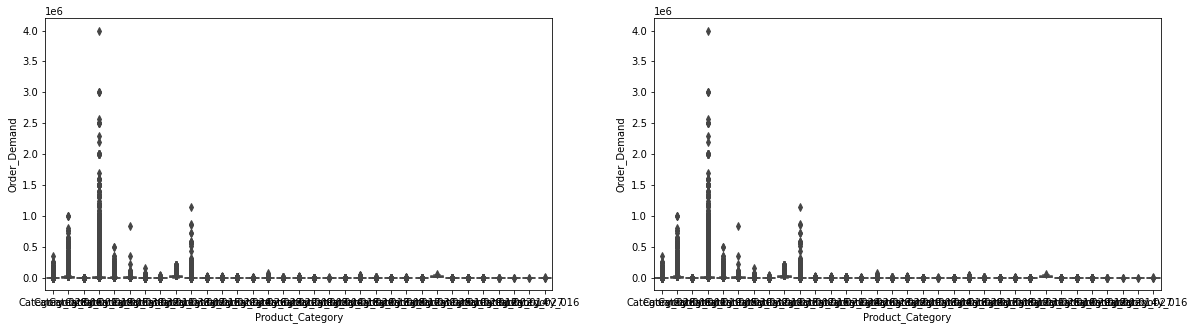

In [ ]:
rcParams['figure.figsize']=20,5
f,axes =plt.subplots(1,2)
regDataPC=sn.boxplot(df['Product_Category'],df['Order_Demand'],ax=axes[0])
logDataPC=sn.boxplot(df['Product_Category'],df['Order_Demand'],ax=axes[1])
del regDataPC, logDataPC

To check the Orders by Product Category.

In [ ]:
rcParams['figure.figsize'] = 50,12

Taking subset of data temporarily for in memory compute.

## ***2.5 Exploring the Data as Year Time Series for ARIMA Model***

The box plot graph is to visualize the total number of order_demand based on the product_category.

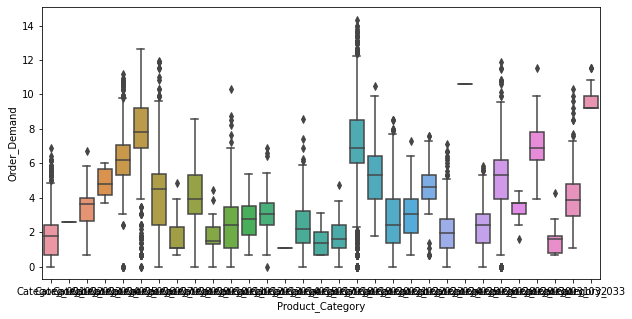

In [ ]:
df_temp = df.sample(n=20000).reset_index()
comp_everyprod = sn.boxplot( df_temp['Product_Category'].sort_values(),np.log1p(df_temp['Order_Demand']))
del df_temp, comp_everyprod

To visualize the order_demand based on the years in a line graph.

**Step-01**: Calculate the Total Order Qty placed on by Each Day

In [ ]:
df=df.groupby('Date')['Order_Demand'].sum().reset_index()

**Step-02**: Indexing the Date Column as for further procssing.

In [ ]:
df = df.set_index('Date')
df.index #Lets check the index

DatetimeIndex(['2011-01-08', '2011-05-31', '2011-06-24', '2011-09-02',
               '2011-09-27', '2011-09-30', '2011-10-20', '2011-10-31',
               '2011-11-04', '2011-11-18',
               ...
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09'],
              dtype='datetime64[ns]', name='Date', length=1729, freq=None)

**Step-03**: Averages daily sales value for the month, and using the start of each month as the timestamp.

In [ ]:
monthly_avg_sales = df['Order_Demand'].resample('MS').mean()
#check for NA in this column
monthly_avg_sales.isna().sum()
monthly_avg_sales = monthly_avg_sales.fillna(monthly_avg_sales.bfill())

Visualizing time series.

## ***2.6 Exploring the Data as Monthly Time Series for LSTM Model***

The line graph is to understand the monthly sales between 2011 to 2017 based on the order_demand.

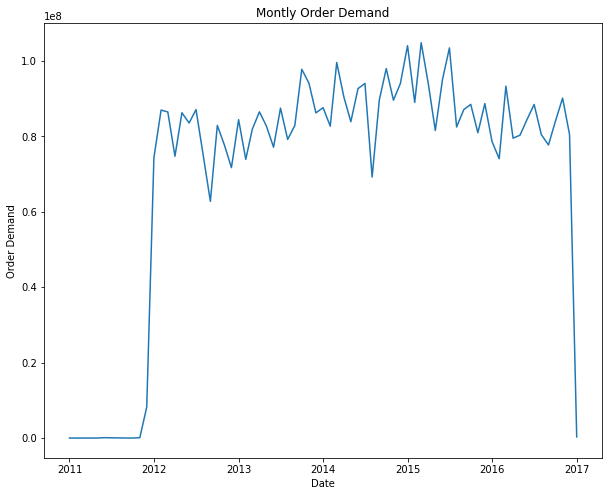

In [ ]:
#here
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=10,8
plt.plot(df_sales['Date'],df_sales['Order_Demand'])
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Montly Order Demand')

plt.show()

Create a new dataframe to model for the LSTM model.

In [ ]:
df_diff = df_sales.copy()
#add previous sales to the next row
df_diff['prev_sales'] = df_diff['Order_Demand'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['Order_Demand'] - df_diff['prev_sales'])
df_diff.head(10)

,Date,Order_Demand,prev_sales,diff
1,2011-05-01,108,2.0,106.0
2,2011-06-01,92000,108.0,91892.0
3,2011-09-01,6728,92000.0,-85272.0
4,2011-10-01,7,6728.0,-6721.0
5,2011-11-01,86524,7.0,86517.0
6,2011-12-01,8178525,86524.0,8092001.0
7,2012-01-01,74331037,8178525.0,66152512.0
8,2012-02-01,86951780,74331037.0,12620743.0
9,2012-03-01,86463212,86951780.0,-488568.0
10,2012-04-01,74714053,86463212.0,-11749159.0


The line graph is to understand the monthly sales between 2011 to 2017 based on the order_demand after modeling.


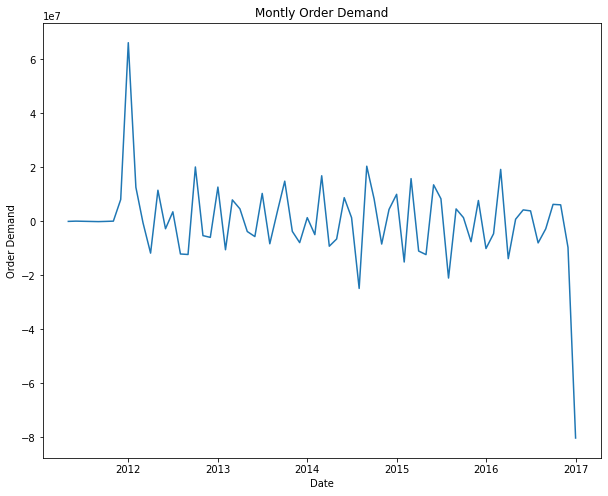

In [ ]:
rcParams['figure.figsize']=10,8
plt.plot(df_diff['Date'],df_diff['diff'])
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Montly Order Demand')

plt.show()

## ***2.7 Exploring the Data as Monthly Time Series for AR, MA and Combined Model***

Step-01: Calculate the Total Order Qty placed on by Each Day

In [17]:
dataset=dataset.groupby('Date')['Order_Demand'].sum().reset_index()

Step-02: Indexing the Date Column as for further procssing.

In [18]:
dataset = dataset.set_index('Date')
dataset.index #Lets check the index

DatetimeIndex(['2011-01-08', '2011-05-31', '2011-06-24', '2011-09-02',
               '2011-09-27', '2011-09-30', '2011-10-20', '2011-10-31',
               '2011-11-04', '2011-11-18',
               ...
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09'],
              dtype='datetime64[ns]', name='Date', length=1729, freq=None)

Step-03:#Averages daily sales value for the month, and using the start of each month as the timestamp.

In [19]:
monthly_avg_sales = dataset['Order_Demand'].resample('MS').mean()
#check for NA in this column
monthly_avg_sales.isna().sum()
monthly_avg_sales = monthly_avg_sales.fillna(monthly_avg_sales.bfill())

Visualizing time series.

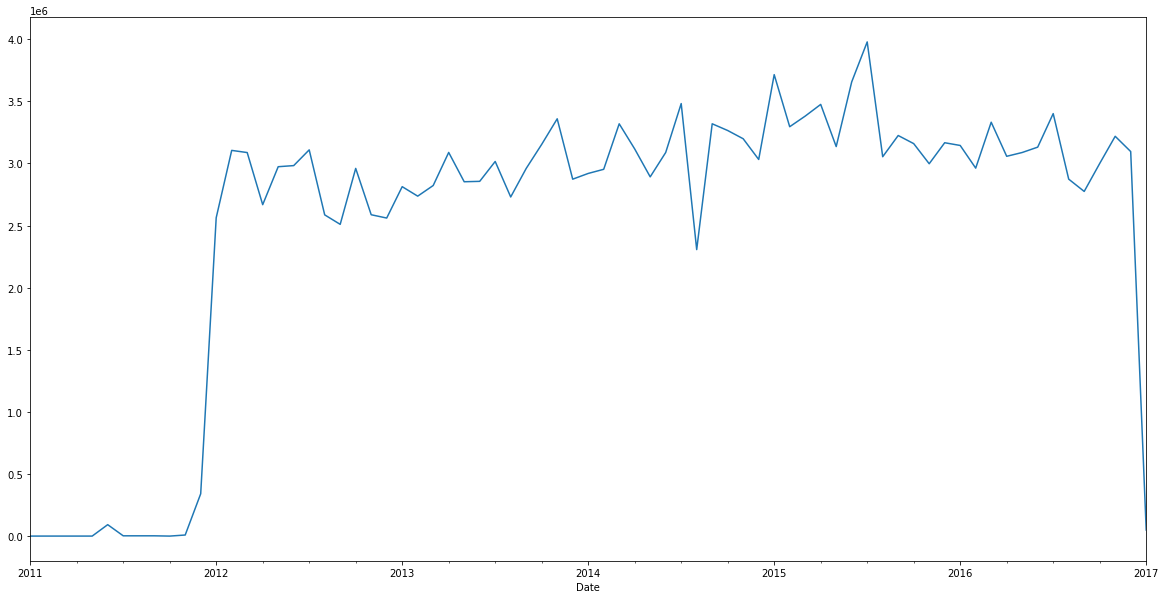

In [20]:
monthly_avg_sales.plot(figsize=(20,10))
plt.show()

1. Determing rolling statistics
2. Plot rolling statistics
3. Perform Dickey-Fuller test
4. To visualizze the rolling mean and standard deviation.


In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

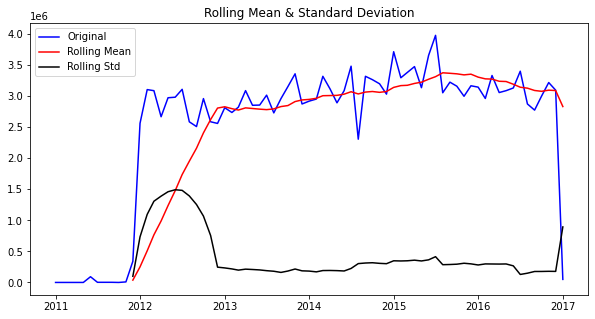

Results of Dickey-Fuller Test:
Test Statistic                 -2.078083
p-value                         0.253418
#Lags Used                      0.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [23]:
test_stationarity(monthly_avg_sales)

To visualize the average monthly sales of every year.

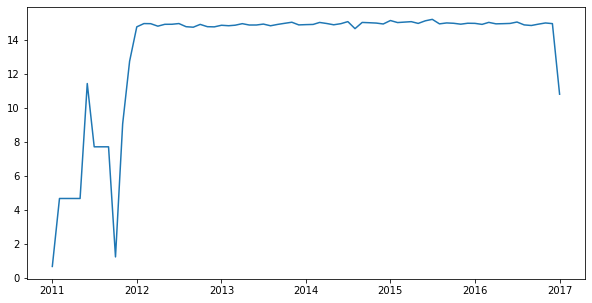

In [25]:
ts_log = np.log(monthly_avg_sales)
plt.plot(ts_log)

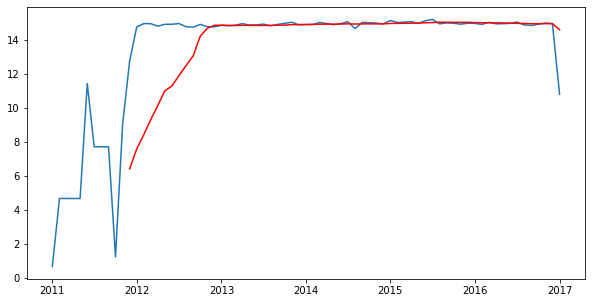

In [26]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

To visualize the rolling mean and standard deviation of order_demand and date.

In [27]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2011-01-01         NaN
2011-02-01         NaN
2011-03-01         NaN
2011-04-01         NaN
2011-05-01         NaN
2011-06-01         NaN
2011-07-01         NaN
2011-08-01         NaN
2011-09-01         NaN
2011-10-01         NaN
2011-11-01         NaN
2011-12-01    6.317735
Freq: MS, Name: Order_Demand, dtype: float64

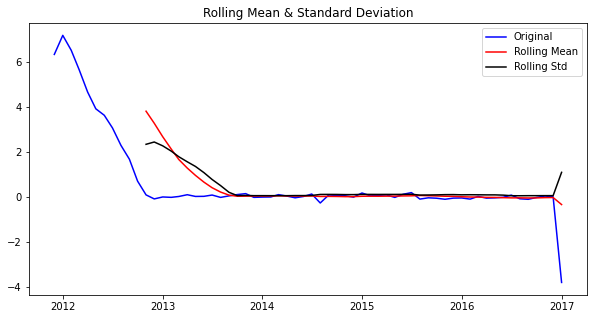

Results of Dickey-Fuller Test:
Test Statistic                 -2.003810
p-value                         0.284905
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


In [28]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

To visualize the expected average weight of order_demand and date.

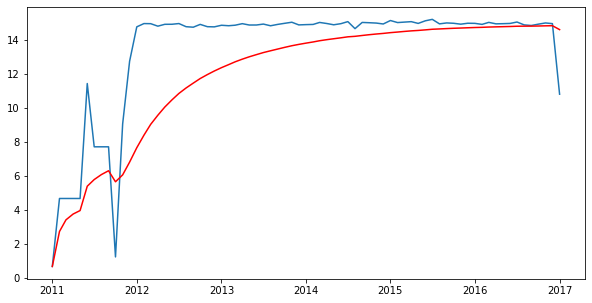

In [29]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

To visualize the rolling mean and standard deviation.

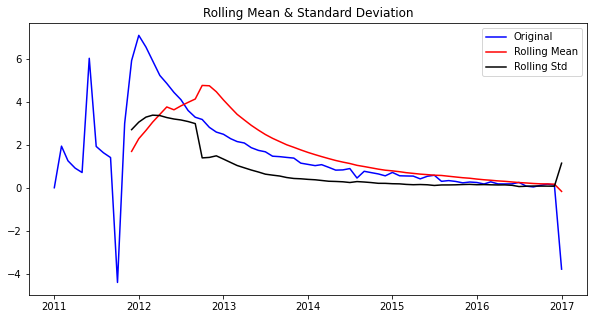

Results of Dickey-Fuller Test:
Test Statistic                 -3.034560
p-value                         0.031791
#Lags Used                      0.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [30]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

To visualize the number of order_demand including the refunded and shipped.

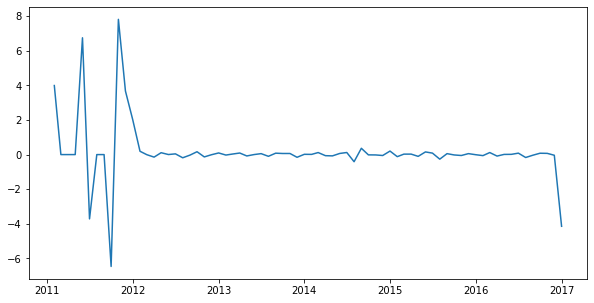

In [31]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

To visualize the rolling mean and standard deviation of number of order_demand.

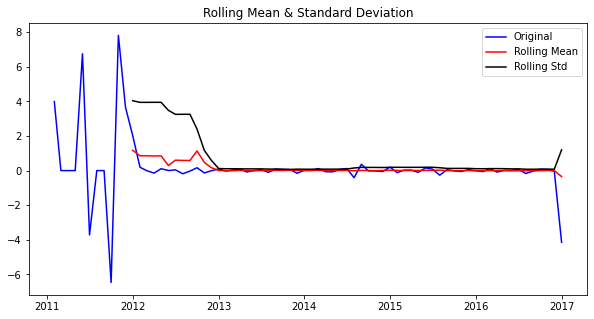

Results of Dickey-Fuller Test:
Test Statistic                -1.017387e+01
p-value                        6.974696e-18
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


In [32]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

To visualize the differences between the original, trend, seasonality and residuals.

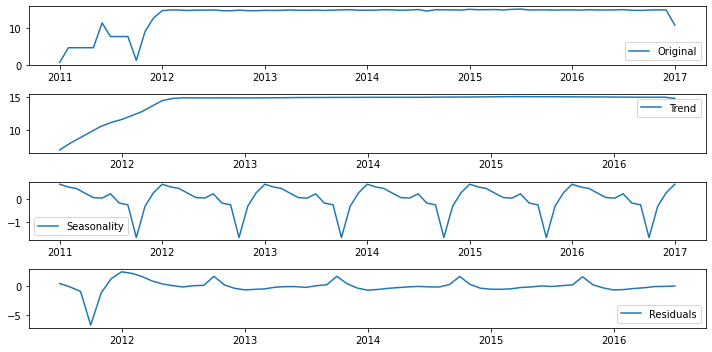

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

To visualize the rolling mean and standard deviation.

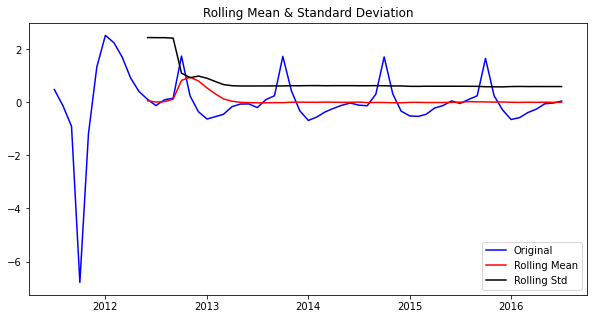

Results of Dickey-Fuller Test:
Test Statistic                 -5.265711
p-value                         0.000006
#Lags Used                      2.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [34]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# **Stage3- Data Preparation**

##***3.1 Data Scaling and Featuring***

To know the first date and last date of the dataset.

In [7]:
df['Date'].min() , df['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

To check the ditribution of the target variable (Order_Demand).

In [8]:
from scipy.stats import norm, skew #Import Norm and skew for some statistics
from scipy import stats #Import stats
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from matplotlib import rcParams

To figure size in inches and plot the distribution.

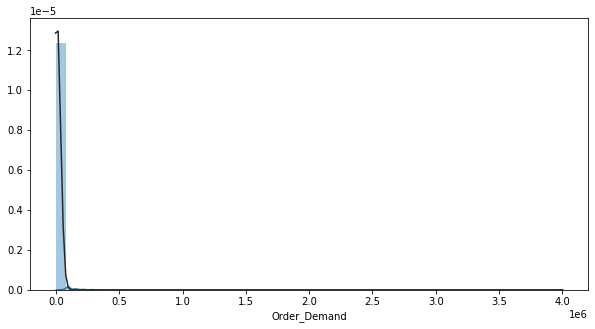

In [14]:
rcParams['figure.figsize'] = 10,5
sn.distplot(df['Order_Demand'],fit=norm)

Probablility plot is used to identify any unusual value of the ordered value.

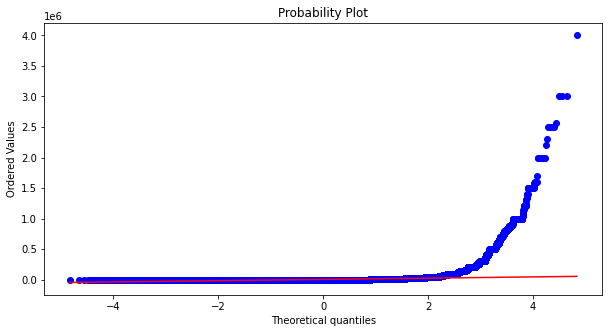

In [15]:
fig = plt.figure() 
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.<br>
To find the skew of this data since is going to use ARIMA therefore can ignore the skew level(no transformation needed).



In [ ]:
df.skew()

##***3.2 Data Cleaning for ARIMA model***

Since the number of missing value is 1.07% from the section 2.2, so remove it to let the data to be workable. The interpolation is not necessary in this case, the row with NA will be drop.

In [11]:
df.dropna(axis=0, inplace=True) #Remove all the rows with na's
df.reset_index(drop=True)
df.sort_values('Date')[1:50]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
17249,Product_0608,Whse_C,Category_001,2011-09-27,5
17250,Product_1933,Whse_C,Category_001,2011-09-27,23
74615,Product_0875,Whse_C,Category_023,2011-09-30,5450
131426,Product_0125,Whse_S,Category_011,2011-10-20,(2)
131429,Product_0412,Whse_S,Category_007,2011-10-20,(2)
75193,Product_0642,Whse_C,Category_019,2011-10-31,3


Found that there is () for some of the Order_Demand column therefore replaced them with empty space. Because with the () the entire column will be string instead of Integar.

In [12]:
df['Order_Demand']=df['Order_Demand'].str.replace('(',"")#used to compare whether the () still inside the column
df['Order_Demand']=df['Order_Demand'].str.replace(')',"")
df.sort_values('Date')[1:50]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
17249,Product_0608,Whse_C,Category_001,2011-09-27,5
17250,Product_1933,Whse_C,Category_001,2011-09-27,23
74615,Product_0875,Whse_C,Category_023,2011-09-30,5450
131426,Product_0125,Whse_S,Category_011,2011-10-20,2
131429,Product_0412,Whse_S,Category_007,2011-10-20,2
75193,Product_0642,Whse_C,Category_019,2011-10-31,3


Seem no more () and only int is inside the column order_demand after removing the (). Now can convert the data type of Order_Demand to int64.

In [13]:
df['Order_Demand'] = df['Order_Demand'].astype('int64')

## ***3.3 Data Cleaning for LSTM Model***

Represent month in date field as its first day.

In [ ]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales.dropna(subset = ["Date"], axis=0, inplace=True)
df_sales['Date'] = df_sales['Date'].dt.year.astype('str') + '/' + df_sales['Date'].dt.month.astype('str') + '/01'
df_sales['Date'] = df_sales['Date'].replace('\.0', '', regex=True)
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
# using dictionary to convert specific columns

Removing () from the "Order_Demand" Column.

In [ ]:
df_sales['Order_Demand']=df_sales['Order_Demand'].str.replace('(',"")
df_sales['Order_Demand']=df_sales['Order_Demand'].str.replace(')',"")
df_sales['Order_Demand'] = df_sales['Order_Demand'].astype('int64')
#groupby date and sum the sales
df_sales = df_sales.groupby(['Date'])['Order_Demand'].sum().reset_index()

## ***3.4 Data Cleaning for AR, MA and Combined Model***

Clean the empty daily data since we going to do it monthy, thefore will find the average for it. Replace the () in the Order_Demand table with empty string.

In [16]:
dataset.dropna(axis=0, inplace=True) #Remove all the rows with na's
dataset.reset_index(drop=True)
dataset.sort_values('Date')[1:50]

dataset['Order_Demand']=dataset['Order_Demand'].str.replace('(',"")
dataset['Order_Demand']=dataset['Order_Demand'].str.replace(')',"")
dataset['Order_Demand'] = dataset['Order_Demand'].astype('int64')

#**Stage4- Modeling**

##***4.1 Decomposition Analysis to calculate the seasonality, trend and residual***

Calculate the Seasonality , Trend and Residuals with Decomposition Analysis.<br>
Using Time Series for Decomposition. 


In [ ]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX #for the Seasonal Forecast
rcParams['figure.figsize'] = 20, 10

Using sm it is to analyse the sesonality based on the original graph.

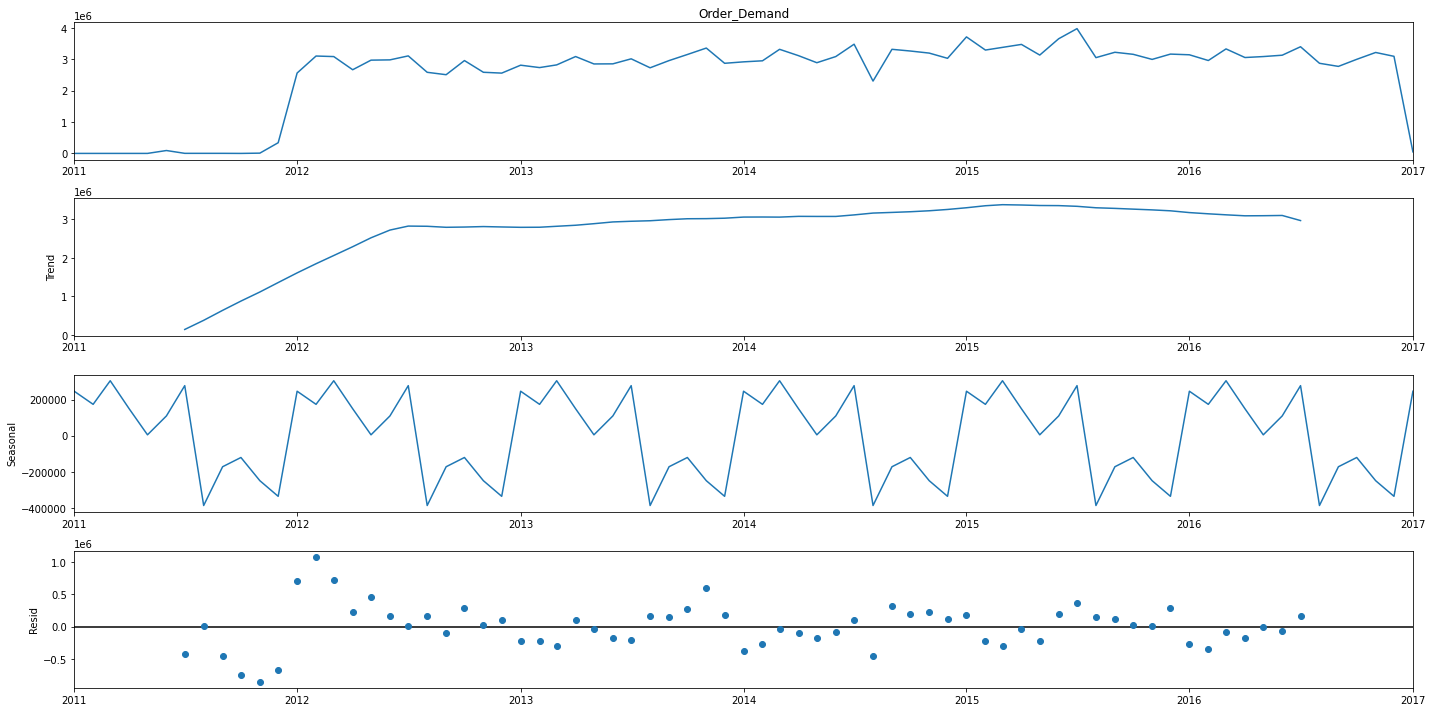

In [ ]:
decomposition = sm.tsa.seasonal_decompose(monthly_avg_sales, model='additive')
fig = decomposition.plot()
plt.show()

trend - reflected the longter progression of the time series.

seasonal - reflected the seasonal pattern that exists in the dataset by year.

residual - reflected the left over data from the original after the seasonal decomposition.


## ***4.2 Arima Modeling - Grid Search (SARIMAX)***

**STEP-01**:

*   For each combination of parameters, fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.
*   Sample params for seasonal ARIMA (SARIMAX).

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX1: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX2: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX3: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX4: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX1: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX2: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX3: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX4: (0, 1, 0) x (1, 0, 0, 12)


**STEP-02**:

*   Get the best params for the data. Choose the lowest AIC.
*   The Akaike information criterion (AIC) measures how well a model fits the data while taking into account the overall complexity of the model.
*   Large AIC: Model fits very well using a lot of features.
*  Small AIC: Model fits similar fit but using lesser features. 
*  The LOWER THE AIC, the better it is.

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_avg_sales,
                                            order=param,
                                            seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2344.0704307124033
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1934.1928835402205
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1862.6079313938828
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1413.1955930564604
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1897.8374721163148


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1997.2321572752187
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1440.6014550343189
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1414.0578928049904
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2265.2767997696283
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1876.5613755934517
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1790.802546471937
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1412.3527721130936
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1934.8291713221968
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1872.8686458303498
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1471.939134529464
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1414.2544026189012
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2081.849011696963
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1728.3815053402643
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1741.6306755793414
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1386.1268927048313
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1752.2949192972621
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1727.5980407023826
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - 

SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1351.1631068717465
<br>The above output suggests that ARIMA(1, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value: 1351.1631068717465

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(monthly_avg_sales,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1130      0.828     -0.137      0.891      -1.736       1.510
ma.L1         -0.6431      0.621     -1.035      0.301      -1.861       0.575
ma.S.L12      -1.0802      0.028    -38.878      0.000      -1.135      -1.026
sigma2      3.708e+11   1.89e-12   1.96e+23      0.000    3.71e+11    3.71e+11


Analysis of Co-efficiecnt and Standrad Error by interpeting the above Result.<br>

coeff: Shows weight/impotance how each feature impacts the time series. <br>

Pvalue: Shows the significance of each feature weight. Can test hypothesis using this. If p value is <.05 then they are statitically significant.<br>

Refresher on null hyp and pvalues. <br>
*   The null hyp as 'there is no relationship bw them'.
*   If p value < .05 (significance level) then reject the Null Hypthesis.
*   If p value > .05 , then fail to reject the Null Hypothesis.
*   So, if the p-value is < .05 then there is a relationship between the response and predictor. Hence, significant.


## ***4.3 Long-Short-Term Memory Model(LSTM)***

Create dataframe for transformation from time series to supervised.<br>
Use the previous monthly sales data to forecast the next ones.<br> 
The look-back period may vary for every model. There will be 12 for this example.

In [ ]:
df_supervised = df_diff.drop(['prev_sales'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

New dataframe called df_supervised is prepared for LSTM model.

In [ ]:
df_supervised.head()

,Date,Order_Demand,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2012-07-01,87071567,3549888.0,-2724372.0,11531998.0,-11749159.0,-488568.0,12620743.0,66152512.0,8092001.0,86517.0,-6721.0,-85272.0,91892.0,106.0
1,2012-08-01,75003241,-12068326.0,3549888.0,-2724372.0,11531998.0,-11749159.0,-488568.0,12620743.0,66152512.0,8092001.0,86517.0,-6721.0,-85272.0,91892.0
2,2012-09-01,62748329,-12254912.0,-12068326.0,3549888.0,-2724372.0,11531998.0,-11749159.0,-488568.0,12620743.0,66152512.0,8092001.0,86517.0,-6721.0,-85272.0
3,2012-10-01,82891675,20143346.0,-12254912.0,-12068326.0,3549888.0,-2724372.0,11531998.0,-11749159.0,-488568.0,12620743.0,66152512.0,8092001.0,86517.0,-6721.0
4,2012-11-01,77618687,-5272988.0,20143346.0,-12254912.0,-12068326.0,3549888.0,-2724372.0,11531998.0,-11749159.0,-488568.0,12620743.0,66152512.0,8092001.0,86517.0


Fit a linear regression model (OLS — Ordinary Least Squares) and calculate the Adjusted R-squared

In [ ]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12 ', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.255472383914513


Import MinMaxScaler and create a new dataframe for LSTM model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['Order_Demand','Date'],axis=1)

Split train and test set for 12 months.



In [ ]:
train_set, test_set = df_model[:-12].values, df_model[-12:].values

Apply Min Max Scaler.

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)

Reshape training set.

In [ ]:
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)

Reshape test set.

In [ ]:
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [ ]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

Prints how the model improves itself and reduce the error in each epoch:

In [ ]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3224
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2844
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2676
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2575
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2496
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2426
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2363
Epoch 8/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2302
Epoch 9/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2244
Epoch 10/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2187
Epoch 11/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2130
Epoch 12/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2074
Epoch 13/100
43/43 [=================

## ***4.4 Arima Modeling - Auto_ARIMA***

Train 80% and test 20%.

In [ ]:
train2, test2 = monthly_avg_sales[:(int(len(monthly_avg_sales)*0.8))], monthly_avg_sales[(int(len(monthly_avg_sales)*0.8)):]


The line graph is to visualize the possible predicted sales from 2016 to 2017. 

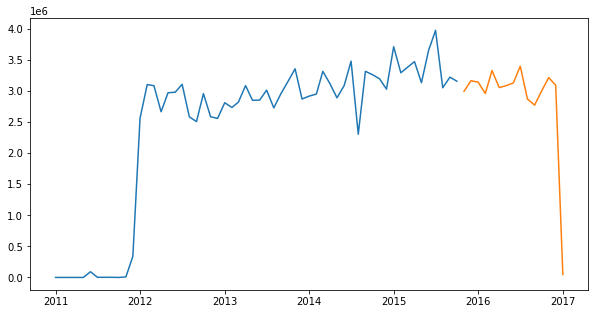

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(train2)
plt.plot(test2)
plt.show()

Use auto ARIMA to find out the best fit of the p,q,d instead of using SARIMAX to compare their AIC manually. From the best fit it gave then will continue to do the forecast and prediction.

In [ ]:
import pyramid as pm
from pyramid import auto_arima
Arima_model = pm.auto_arima(train2, start_p=0,start_q=0,max_p=2,max_q=2, start_P=0,start_Q=0,max_P=2,max_Q=2,m=12,seasonal=True,trace=True,max_D=2,D=2,error_action='warn',suppress_warnings=True,stepwise=True)
Arima_model.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 2, 0, 12); AIC=992.354, BIC=995.347, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 2, 0, 12); AIC=981.634, BIC=987.620, Fit time=0.265 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=979.364, BIC=985.350, Fit time=0.359 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 2, 1, 12); AIC=978.782, BIC=986.264, Fit time=0.442 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 2, 0, 12); AIC=981.348, BIC=987.334, Fit time=0.250 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 2, 2, 12); AIC=979.652, BIC=988.631, Fit time=4.421 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 0, 12); AIC=995.305, BIC=999.794, Fit time=0.087 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 2, 2, 12); AIC=978.455, BIC=988.930, Fit time=2.190 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 2, 2, 12); AIC=978.913, BIC=990.886, Fit time=4.461 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   58
Model:             SARIMAX(0, 1, 1)x(2, 2, [], 12)   Log Likelihood                -482.300
Date:                             Sun, 13 Sep 2020   AIC                            974.600
Time:                                     09:21:06   BIC                            982.083
Sample:                                          0   HQIC                           977.118
                                              - 58                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.329e+05   1.97e+05      0.673      0.501   -2.54e+05     5.2e+05
ma.L1          0.0537      0.256      0.210      0.834      -0.447       0.555
ar.S.L12      -0.9260      0.282     -3.285      0.001      -1.479      -0.374
ar.S.L24      -0.5901      0.488     -1.210      0.226      -1.546       0.365
sigma2      4.927e+11      0.017   2.94e+13      0.000    4.93e+11    4.93e+11
===================================================================================
Ljung-Box (Q):                       51.03   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.02   Prob(JB):                         0.71
Heteroskedasticity (H):               1.09   Skew:                            -0.07
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.19e+29. Standard errors may be unstable.
"""

## ***4.5 Plotting the diagnostics.***

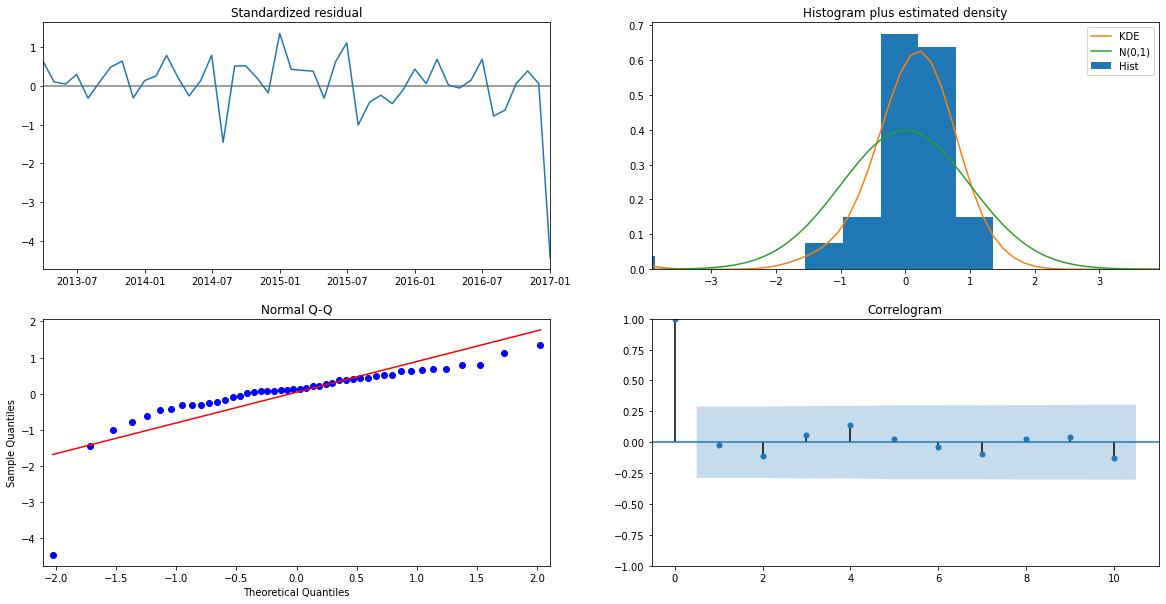

In [ ]:
#To quickly generate model diagnostics and investigate for any unusual behavior.
results.plot_diagnostics(figsize=(20, 10))
plt.show()

#What are the details for analysis and check?
#1. Residuals SHOULD be Normally Distributed ; Check
#Top Right: The (orange colored) KDE line should be closely matched with green colored N(0,1) line. This is the standard notation
#for normal distribution with mean 0 and sd 1.
#Bottom Left: The qq plot shows the ordered distribution of residuals (blue dots) follows the linear trend of the samples 
#taken from a standard normal distribution with N(0, 1). 

#2. #Residuals are not correlated; Check
#Top Left: The standard residuals don’t display any obvious seasonality and appear to be white noise. 
#Bottom Right: The autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have 
#low correlation with its own lagged versions.

## ***AR, MA and Combined Model***

In [40]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Autocorrelation Function(ACF): it measure the correlation between the monthly_avg_sales with lagged version of itself.

Text(0.5, 1.0, 'Autocorrelation Function')

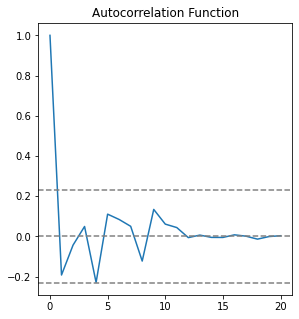

In [45]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Partial Autocorrelation Function (PACF) measures the correlation between the monthly_avg_sales with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons

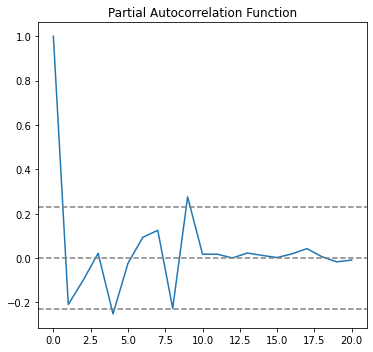

In [41]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

This is using the AR Model to run with p=2,q=1,d=0, draw the graph and find the RSS(is for the values of residuals and not actual series).

Text(0.5, 1.0, 'RSS: 201.7997')

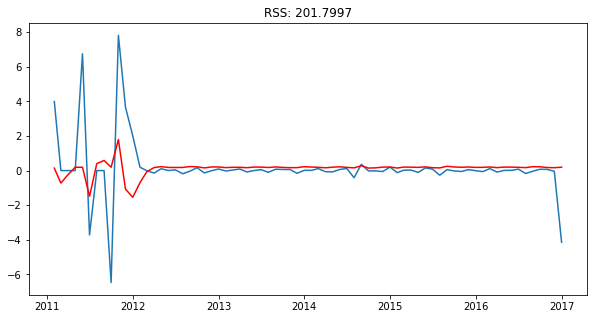

In [42]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

This is using MA Model to run with p=0,q=1,d=2

Text(0.5, 1.0, 'RSS: 200.8431')

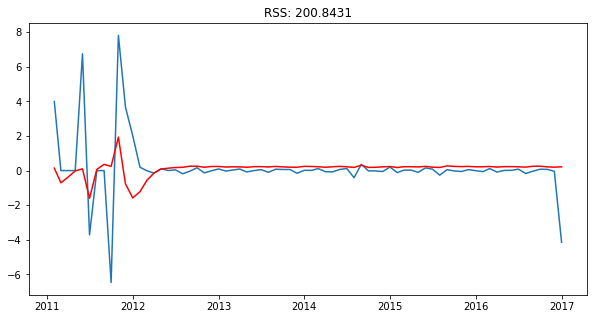

In [43]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Combined Model been used at here to run with p=2,q=1,d=2

Text(0.5, 1.0, 'RSS: 192.9186')

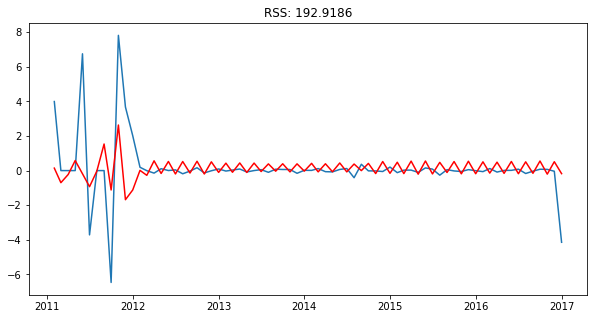

In [44]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

#**Stage5- Evaluation**

## ***5.1 Arima Model Evaluation Analysis***

To get the predictions, the forecasts start from the 1st of Jan 2017 but the previous line shows how it fits to the data.<br>
**Note**: The forecats seems to be fitting well to the data. The Blue/purple thicker plot shows the confidence level in the forecasts. 

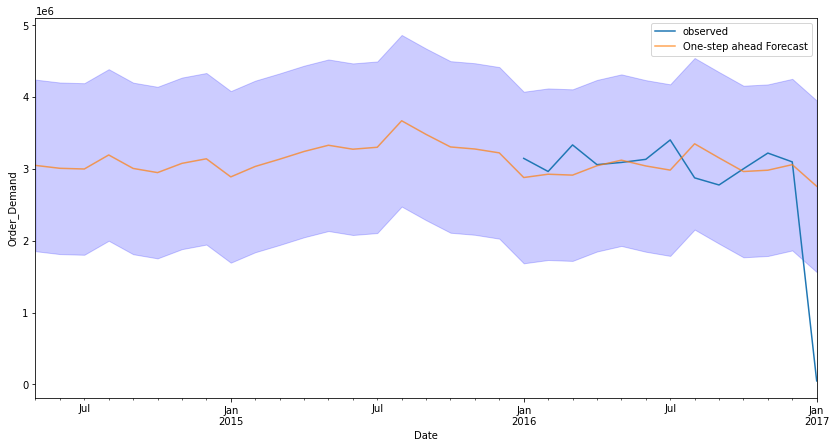

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2014-05-01'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int()

#Plotting real and forecasted values.
ax = monthly_avg_sales['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

Calculating the Forecast Accuracy. <br>
Calculating the mean squared error (average error of forecasts) and the lower Mean Square Error always reflects the better results.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = monthly_avg_sales['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))

MSE 630216236274.86
RMSE: 793861.6


## ***5.2 Forecasting for ARIMA model***

Far out values are naturally more prone to greater variance. <br>
The grey area is the confidence we have in the predictions and the corealtes to .

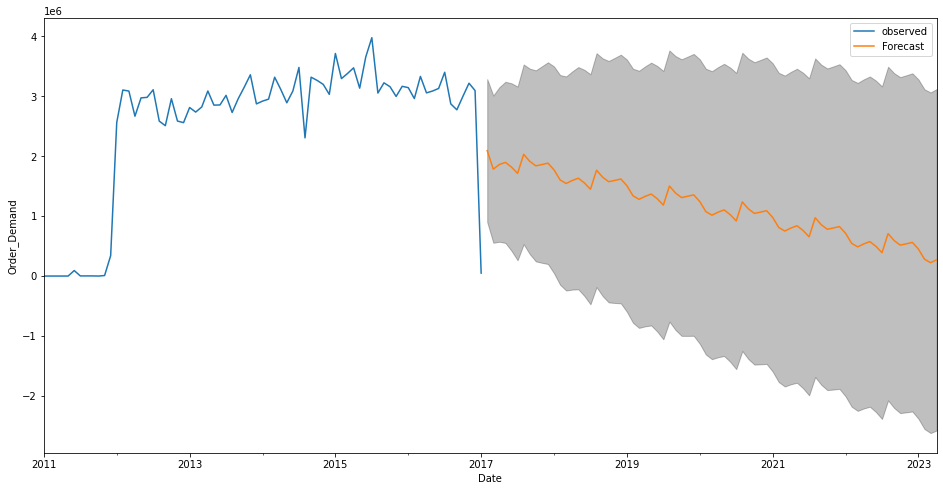

In [ ]:
#Add on months 
pred_uc = results.get_forecast(steps=75)
pred_ci = pred_uc.conf_int()
ax = monthly_avg_sales.plot(label='observed', figsize=(16, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test2, preds)))

## ***5.3 LSTM Model Evaluation Analysis***

Predict and see how the results look like.

In [ ]:
y_pred = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1

In [ ]:
y_pred

array([[-0.19895327],
       [ 0.8544661 ],
       [-0.29948395],
       [-0.34536326],
       [ 0.61376387],
       [ 0.03643339],
       [-0.46678895],
       [ 0.35587442],
       [ 0.10556286],
       [ 0.02593873],
       [ 0.02259438],
       [ 0.02463363]], dtype=float32)

In [ ]:
y_test

array([[-0.10454328],
       [ 0.94738529],
       [-0.51282444],
       [ 0.13229452],
       [ 0.28508841],
       [ 0.26889089],
       [-0.25505653],
       [-0.02544562],
       [ 0.37562138],
       [ 0.36792907],
       [-0.32853113],
       [-3.44754524]])

These are scaled data that shows the difference, need to do the inverse transformation for scaling.



Reshape y_pred

In [ ]:
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])

Rebuild test set for inverse transform

In [ ]:
pred_test_set = []
for index in range(0,len(y_pred)):
    print (np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))

[[-0.19895327 -0.34700461  0.43883677 -0.23583149  0.15884835  0.30090391
  -0.9155227  -0.27015661 -0.15674933 -0.72473219 -0.69572963 -0.10620528
  -0.78484543]]
[[ 0.85446608 -0.10454328 -0.34700461  0.43883677 -0.23583149  0.15884835
  -0.35290973 -0.9155227  -0.27015661 -0.15674933 -0.72473219 -0.69572963
  -0.10620528]]
[[-0.29948395  0.94738529 -0.10454328 -0.34700461  0.43883677 -0.23583149
  -0.42357042 -0.35290973 -0.9155227  -0.27015661 -0.15674933 -0.72473219
  -0.69572963]]
[[-0.34536326 -0.51282444  0.94738529 -0.10454328 -0.34700461  0.43883677
  -0.61989044 -0.42357042 -0.35290973 -0.9155227  -0.27015661 -0.15674933
  -0.72473219]]
[[ 0.61376387  0.13229452 -0.51282444  0.94738529 -0.10454328 -0.34700461
  -0.28429973 -0.61989044 -0.42357042 -0.35290973 -0.9155227  -0.27015661
  -0.15674933]]
[[ 0.03643339  0.28508841  0.13229452 -0.51282444  0.94738529 -0.10454328
  -0.67518972 -0.28429973 -0.61989044 -0.42357042 -0.35290973 -0.9155227
  -0.27015661]]
[[-0.46678895  0.

Reshape pred_test_set.

In [ ]:
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

Inverse transform

In [ ]:
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

Dataframe has the dates and the predictions.Transformed predictions are showing the difference. Should calculate the predicted sales numbers:

<br>Create dataframe that shows the predicted sales.

In [ ]:
result_list = []
sales_dates = list(df_sales[-12:].Date)
act_sales = list(df_sales[-12:].Order_Demand)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['Date'] = sales_dates[index-1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

In [ ]:
df_result

,pred_value,Date
0,67366296,2017-01-01
1,110440343,2016-02-01
2,70529963,2016-03-01
3,70288105,2016-04-01
4,96243199,2016-05-01
5,87067164,2016-06-01
6,67712847,2016-07-01
7,83553952,2016-08-01
8,84192142,2016-09-01
9,88518339,2016-10-01


Predicted the next six months’ sales numbers merge with actual sales dataframe

In [ ]:
df_sales_pred = pd.merge(df_sales,df_result,on='Date',how='left')

The line graph is to predict the next 12months sales. From here we can see that this LSTM is predicted quite bad in the starting of the 2016. But lately it is on the track and it also predicted the huge drop that happened in 2017. The predicted value is precise but not accurate where the shape of the graph is similar but the time is wrong.

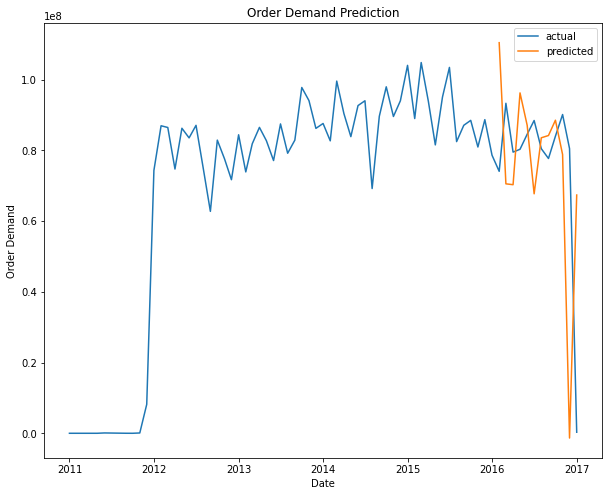

In [ ]:
rcParams['figure.figsize']=10,8
plt.plot(df_sales_pred['Date'],df_sales_pred['Order_Demand'],label="actual")
plt.plot(df_sales_pred['Date'],df_sales_pred['pred_value'],label="predicted")
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.title('Order Demand Prediction')
plt.legend()
plt.show()

In [ ]:
y_pred_comp=np.squeeze(y_pred.astype(np.float64))


Base on the RMSE it is smaller than others which show that the data prediction is slightly better compare to other model. The predicted line is almost all lied on the actual just a little wrong prediction within it.

In [ ]:
from sklearn.metrics import mean_squared_error
import math
print("MSE for predicted test set: %2f" % mean_squared_error(y_test, y_pred_comp))
print("RMSE for predicted test set: %2f"% math.sqrt(mean_squared_error(y_test, y_pred_comp)))

MSE for predicted test set: 1.084394
RMSE for predicted test set: 1.041342


## ***5.4 Forecasting for Auto-Arima Model***

In [ ]:
prediction2 = pd.DataFrame(Arima_model.predict(n_periods=15),index=test2.index)
preds, conf_int = Arima_model.predict(n_periods=test2.shape[0], return_conf_int=True)
prediction2.columns = ['Predicted_Order']

In [ ]:
prediction2.head()

,Predicted_Order
Date,
2015-11-01,3.162132e+06
2015-12-01,2.785964e+06
2016-01-01,2.417156e+06
2016-02-01,1.769066e+06
2016-03-01,2.121756e+06


The line graph is to plot the normal value in order to predict the sales in the 20% of the testing month, which it predicted the drop and continue to grow up jz like the early stage in the January of 2012 then it slowly accurate comapre to the actual result at the middle of 2016 but base on the pass few year it did not expected a huge drop at the end of 2017.

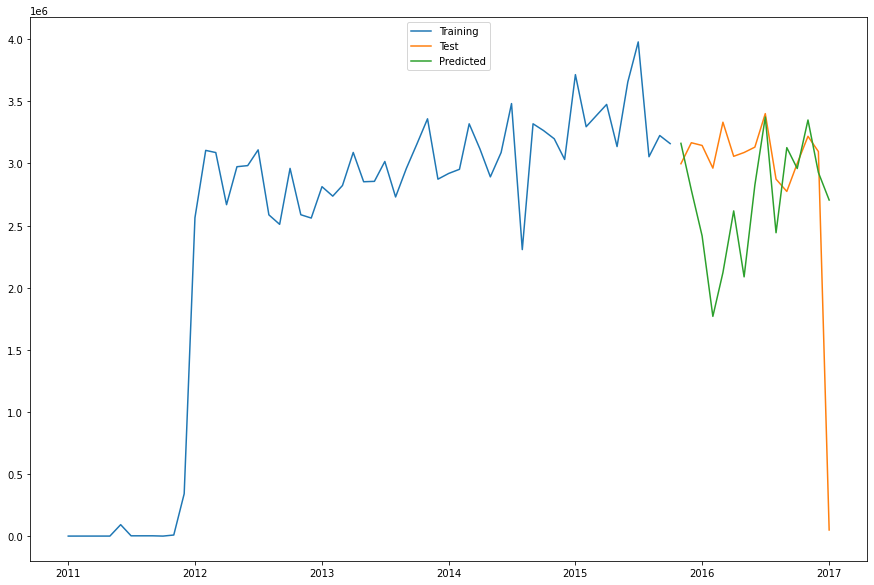

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(train2,label='Training')
plt.plot(test2,label='Test')
plt.plot(prediction2,label='Predicted')
plt.legend(loc='upper center')
plt.show()

The forecast is to predict the next 15 months(start from October 2016 until January 2018) sales based the on the order_demand. The purple region is the maximum and minimun boudary of the possible ploting order_demand.  

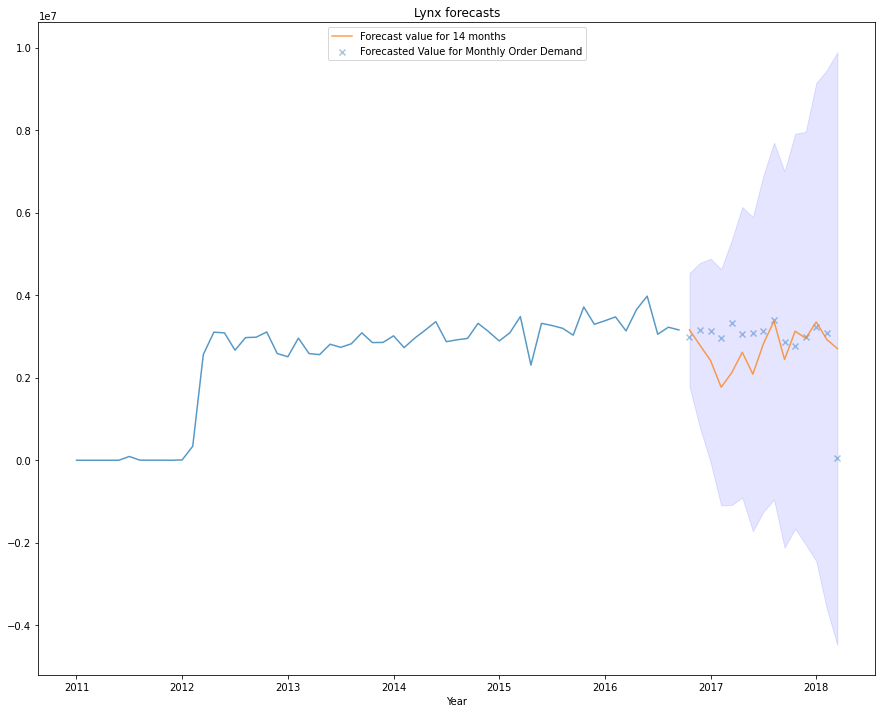

In [ ]:
x_axis = np.arange(train2.shape[0] + prediction2.shape[0])
x_years = x_axis/10 + 2011  # Year starts at 2011
plt.figure(figsize=(15,12))
plt.plot(x_years[x_axis[:train2.shape[0]]], train2, alpha=0.75)
plt.plot(x_years[x_axis[train2.shape[0]:]], prediction2, alpha=0.75,label="Forecast value for 14 months")  # Forecasts
plt.scatter(x_years[x_axis[train2.shape[0]:]], test2,
            alpha=0.4, marker='x',label="Forecasted Value for Monthly Order Demand")  # Test data
plt.fill_between(x_years[x_axis[-prediction2.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("The forecasts for next following 14 months")
plt.xlabel("Year")
plt.legend(loc='upper center')

Based on the result we can conclude that this predict and forecast is not accurate, because of the dataset which having a huge drop at the end of the 2017, might due to some reason, therefore the model is not able to predict the drop.

In [ ]:
from sklearn.metrics import mean_squared_error
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test2, preds)))

Test RMSE: 905439.780


## ***5.5 Forecasting for AR, MA and Combined Model***

In [46]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2011-02-01    0.141865
2011-03-01   -0.699247
2011-04-01   -0.226918
2011-05-01    0.579671
2011-06-01   -0.183759
Freq: MS, dtype: float64

In [47]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2011-02-01    0.141865
2011-03-01   -0.557382
2011-04-01   -0.784300
2011-05-01   -0.204629
2011-06-01   -0.388388
Freq: MS, dtype: float64

In [48]:
predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2011-01-01    0.693147
2011-02-01    4.823996
2011-03-01    4.124749
2011-04-01    3.897831
2011-05-01    4.477502
Freq: MS, dtype: float64

We can see from here this is almost same as SARIMAX which not suitable to use for this dataset prediction. It is having high value of RMSE, meaning it is not neither accurate nor precise toward this dataset.

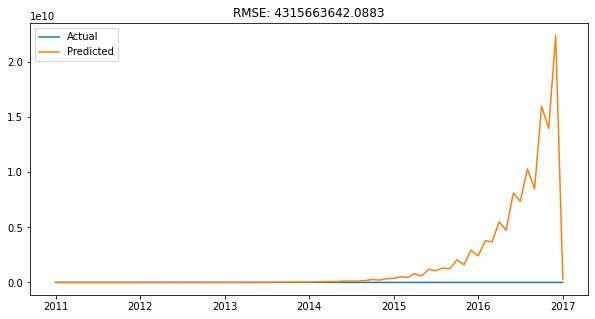

In [49]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(monthly_avg_sales,label="Actual")
plt.plot(predictions_ARIMA,label="Predicted")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-monthly_avg_sales)**2)/len(monthly_avg_sales)))
plt.legend(loc='best')

# **Stage6- Deployment**

This forecasting is designed for any sales relevant business to predict their business sales in the following months and years. It is suitable to inplement in their business current system as an additional plugin feature. Since there are few model inside, they might choose any of it in different situation.

## ***Conclusion***

In a short conclusion, does the models have resolved the business problem as below:
* Is the order damand related to the warehouse location?
<br>Yes, this is because different warehouse result different number of order_demand. Which mean the particular product is best selling in the  warehouse.

* Is the order demand related to the product category?
<br>Yes, this is because some product category having the signficant value than other product category. So, the particular product category is recommended product in the business and affected the number of order_demand.

* Can the sales of a product be predicted based on the order demand records with reasonable accuracy?
<br>Yes, the different models able to forecast the sales based on the order_demand in following months and years. The accuracy is reasonable due to the model is predicting based on the quantified variables but external qualified variable may affect the accuracy  such as spreding of virus. 

In [50]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('DataScience.ipynb')

--2020-09-13 15:50:40--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1301 (1.3K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.27K  --.-KB/s    in 0s      

2020-09-13 15:50:40 (58.9 MB/s) - ‘colab_pdf.py’ saved [1301/1301]

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://ppa

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'